# Bitcoin Price Prediction using Random Forest

This notebook demonstrates how to use a Random Forest model to predict the closing price of Bitcoin using historical data.

In [55]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt


### Step 1: Load and Explore the Dataset

In [68]:

# Load the dataset
file_path = '../bitcoin_price_sentiment.csv'
bitcoin_data = pd.read_csv(file_path)

# Automatically infer and convert the 'date' column to datetime
bitcoin_data['date'] = pd.to_datetime(bitcoin_data['date'], dayfirst=False, errors='coerce')

# Drop rows with NaT values in 'date' (if any) due to incorrect parsing
bitcoin_data = bitcoin_data.dropna(subset=['date'])

# Display the first few rows of the dataset
bitcoin_data.head()


FileNotFoundError: [Errno 2] No such file or directory: '../bitcoin_price_sentiment.csv'

### Step 2: Select and Limit the Data

In [57]:

# Limit to the first 5000 rows
# bitcoin_data = bitcoin_data.head(5000)

# Define features and target variable
data_limited = bitcoin_data.drop(['date'], axis=1)
x_limited = data_limited[['Open', 'High', 'Low', 'Volume', 'sentiment_scores']]
y_limited = data_limited['Close']


In [58]:
# # Standardize Data
# scaler = StandardScaler()
# x_limited = scaler.fit_transform(x_limited)

### Step 3: Split the Data into Training and Test Sets

In [59]:

# Split the limited data into training and test sets
X_train_limited, X_test_limited, y_train_limited, y_test_limited = train_test_split(x_limited, y_limited, test_size=0.2, random_state=42)


### Step 4: Train the Random Forest Model

In [60]:

# Train a Random Forest Regressor model
rf_model_limited = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_limited.fit(X_train_limited, y_train_limited)


RandomForestRegressor(random_state=42)

### Step 5: Make Predictions and Evaluate the Model

In [61]:
# Predict on the limited test set
y_pred_limited = rf_model_limited.predict(X_test_limited)

# Calculate mean absolute error for the limited data
mae_limited = mean_absolute_error(y_test_limited, y_pred_limited)
print(f'Mean Absolute Error : {mae_limited:.2f}')


Mean Absolute Error : 105.63


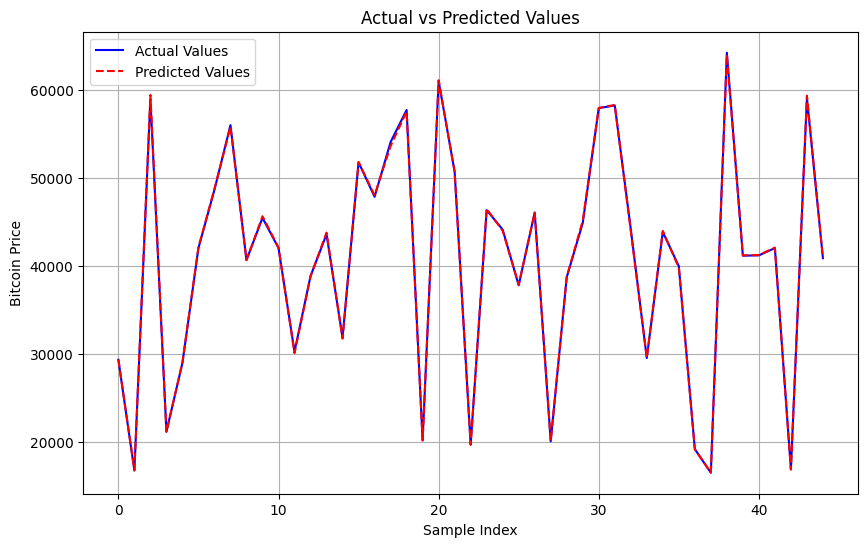

In [62]:

# Plot actual vs predicted values for the limited test set
plt.figure(figsize=(10, 6))
plt.plot(y_test_limited.values, label='Actual Values', color='blue', linestyle='-')
plt.plot(y_pred_limited, label='Predicted Values', color='red', linestyle='--')
plt.title('Actual vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.grid(True)
plt.show()

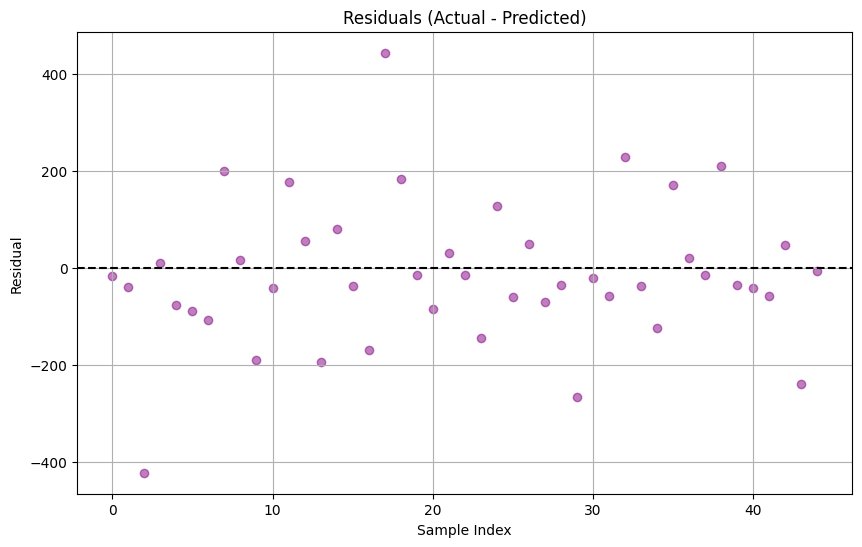

In [63]:
# Calculate residuals
residuals_limited = y_test_limited.values - y_pred_limited

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(range(len(residuals_limited)), residuals_limited, color='purple', alpha=0.5)
plt.axhline(0, color='black', linestyle='--')
plt.title('Residuals (Actual - Predicted)')
plt.xlabel('Sample Index')
plt.ylabel('Residual')
plt.grid(True)
plt.show()

### Step 6: Calculate Percentage Error

In [64]:

# Calculate the mean actual value of the 'Close' prices in the test set to assess the relative percentage error
mean_actual_value = y_test_limited.mean()

# Calculate the percentage error based on the mean absolute error
percentage_error = (mae_limited / mean_actual_value) * 100

print(f'Mean Actual Value: {mean_actual_value:.2f}')
print(f'Percentage Error: {percentage_error:.3f}%')


Mean Actual Value: 40704.51
Percentage Error: 0.260%


In [67]:
# Dunmp scaler and model
import joblib
joblib.dump(scaler, 'rf_scaler.pkl')
joblib.dump(rf_model_limited, 'rf_model.pkl')

['rf_model.pkl']